## Texas Covid19 Predictions - July 7th - August 8th

Megan Riley


In [31]:
remove(list = ls())
library(tidyverse)
library(dplyr)
library(tseries)
library(forecast)
library(tswge)


In [32]:
#Loading the test and original data

corona_df = read.csv("https://raw.githubusercontent.com/megnn/SMUMSDS_ML1/master/Corona%20Predictions/Corona_Curves_TX_NY_NJ.csv")
print("Columns in Training:")
names(corona_df)

test_df = read.csv("https://raw.githubusercontent.com/megnn/SMUMSDS_ML1/master/Corona%20Predictions/Corona_MAE.csv")
print("Dimensions to predict")
dim(test_df)
print("Columns to predict:")
names(test_df)

[1] "Columns in Training:"


[1] "State"                 "Date"                  "Daily_New_Cases"      
 [4] "Curve_Day"             "Pop_Pct"               "Pop_Pct_M1"           
 [7] "Pop_Pct_M2"            "Pop_Pct_M3"            "Pop_Pct_M4"           
[10] "Pop_Pct_M5"            "Pop_Pct_M6"            "Pop_Pct_M7"           
[13] "Three_Day_Avg_Pop_Pct" "Seven_Day_Avg_Pop_Pct" "Pct_Change"           
[16] "Pct_Change_M1"         "Pct_Change_M2"         "Pct_Change_M3"        
[19] "Pct_Change_M4"         "Pct_Change_M5"         "Pct_Change_M6"        
[22] "Pct_Change_M7"         "Three_Day_Avg_Pct_Chg" "Seven_Day_Avg_Pct_Chg"

[1] "Dimensions to predict"


[1] 32  3

[1] "Columns to predict:"


[1] "TX.Date"      "Curve_Day"    "TX.New.Cases"

In [33]:
texas_corona = corona_df %>% filter(State == "TX")
dim(texas_corona)



[1] 18 24

### Model Building

I chose to use time series techniques to build a prediction, after some iteration I found an appropriate model was an ARIMA model built on the Texas data alone. This generated a favored 3,1 ARMA component and I built an ARIMA(3,1,1) model resulting off of this. 



---------WORKING... PLEASE WAIT... 


Error in aic calculation at 4 0 
Error in aic calculation at 5 0 
Five Smallest Values of  aic 


,p,q,aic
11,3,1,14.36034
1,0,0,14.63453
8,2,1,14.68632
7,2,0,14.71450
4,1,0,14.74628



Coefficients of Original polynomial:  
0.2891 -0.3419 -0.4148 

Factor                 Roots                Abs Recip    System Freq 
1-0.8215B+0.7792B^2    0.5271+-1.0028i      0.8827       0.1730
1+0.5324B             -1.8785               0.5324       0.5000
  
  


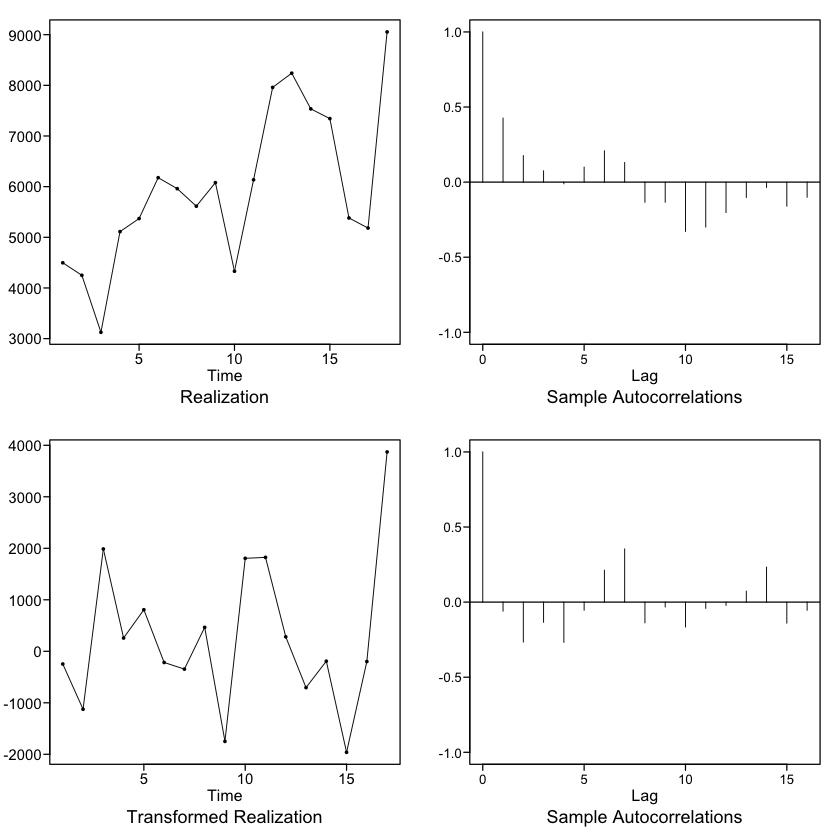

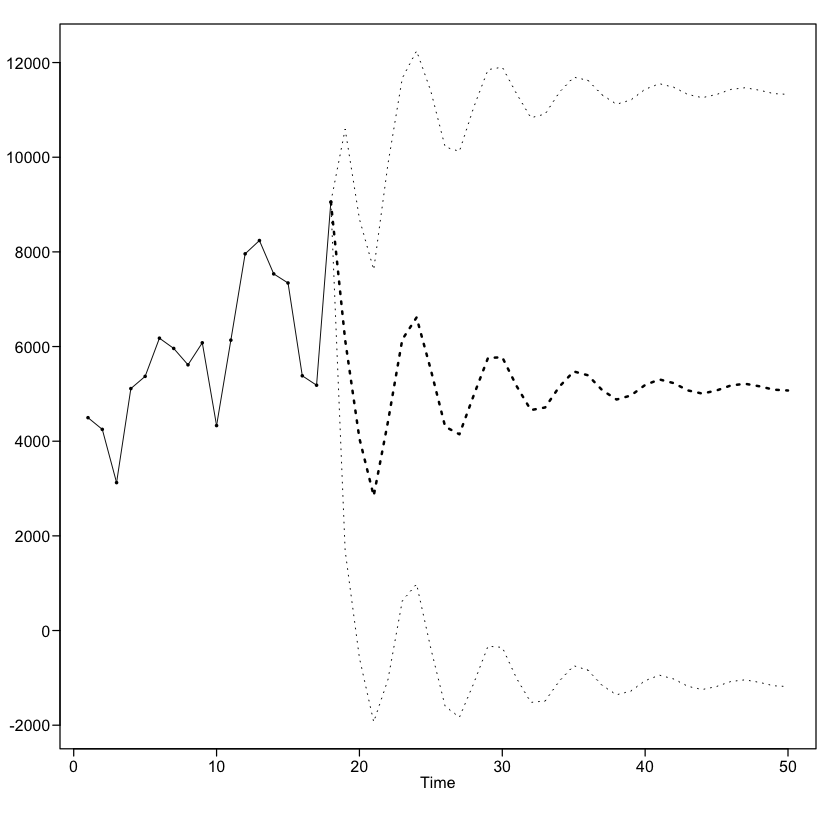

In [34]:
diff1 = artrans.wge(texas_corona$Daily_New_Cases, 1)

aic5.wge(diff1)

tx_arma = est.arma.wge(diff1, p = 3, q =  1)



est_texas = fore.aruma.wge(texas_corona$Daily_New_Cases, phi = tx_arma$phi, theta = tx_arma$theta, d = 1, n.ahead = 32, lastn= FALSE)

In [35]:
print(c("Predictions for next 32 Days are: ",est_texas$f))

 [1] "Predictions for next 32 Days are: " "6140.09035100806"                  
 [3] "4056.91502787091"                   "2845.1595863507"                   
 [5] "4415.62162492853"                   "6147.95189424536"                  
 [7] "6614.5227509542"                    "5505.80594618846"                  
 [9] "4307.23365919556"                   "4146.21552897656"                  
[11] "4969.27712688825"                   "5759.41821823199"                  
[13] "5773.27167302879"                   "5165.7727680569"                   
[15] "4657.67034709513"                   "4712.70569742255"                  
[17] "5154.29305100664"                   "5473.89534108771"                  
[19] "5392.5075509966"                    "5076.55824344219"                  
[21] "4880.47354101985"                   "4965.55140030443"                  
[23] "5188.23014826493"                   "5304.85563634303"                  
[25] "5227.16014492977"                   "5072.4660

Here I calculate the mean average error for this model. 

In [36]:

MAE_arima = 0  

for( i in 1:32)
{
    new_mae = abs(est_texas$f[i] - test_df$TX.New.Cases[i])
    MAE_arima[i] = new_mae
}

MAE_arima
final_MAE = mean(MAE_arima)
final_MAE



print(c("Final Model Mean Average Error is: ", final_MAE))


[1] 3687.90965 6592.08497 9055.84041 6138.37838 2526.04811  251.52275
 [7] 3951.19405 7206.76634 8343.78447 5273.72287 3736.58178 2171.72833
[13] 3543.22723 3267.32965 5618.29430 5373.70695 3928.10466 3159.49245
[19] 2658.44176  571.47354 1221.44860 5848.76985 3912.14436 3615.83986
[25] 4677.53394 1714.07024   70.19667 1819.24235 5996.53163 4464.75159
[31] 2541.29348 2603.59523

[1] 3923.158

[1] "Final Model Mean Average Error is: " "3923.157826297"                     


Below I've plotted the true data including the first 18 observations and 32 previously unknown observations and the forecasts.  

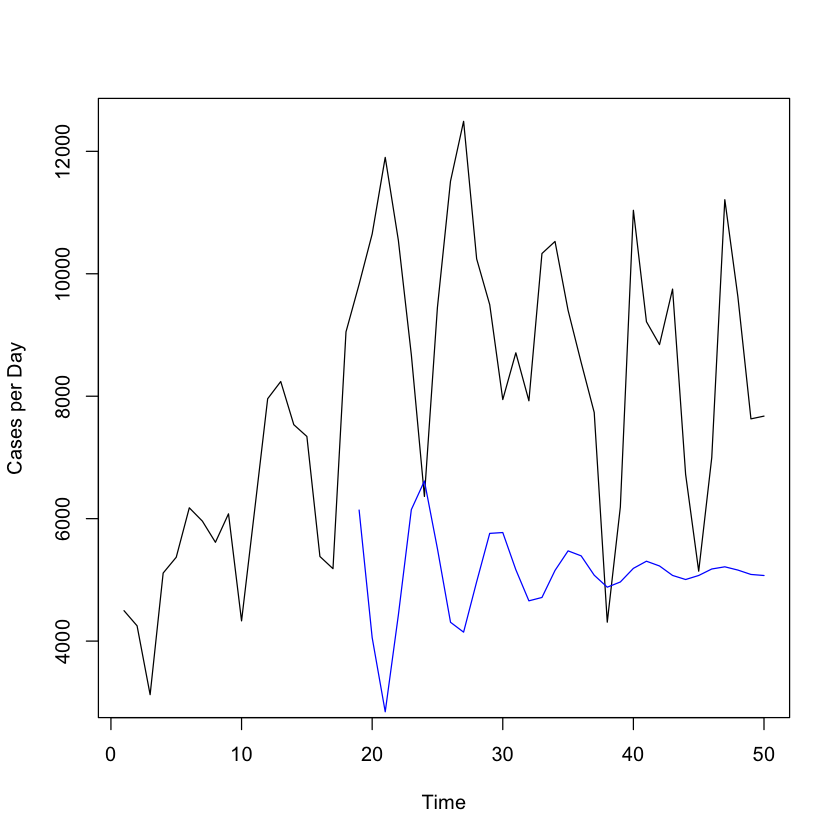

In [37]:
true = c(unlist(texas_corona$Daily_New_Cases), unlist(test_df$TX.New.Cases))


plot( true, type = "l", ylab = "Cases per Day", xlab = "Time")
lines(ts(est_texas$f, start = 19), col = "blue")
